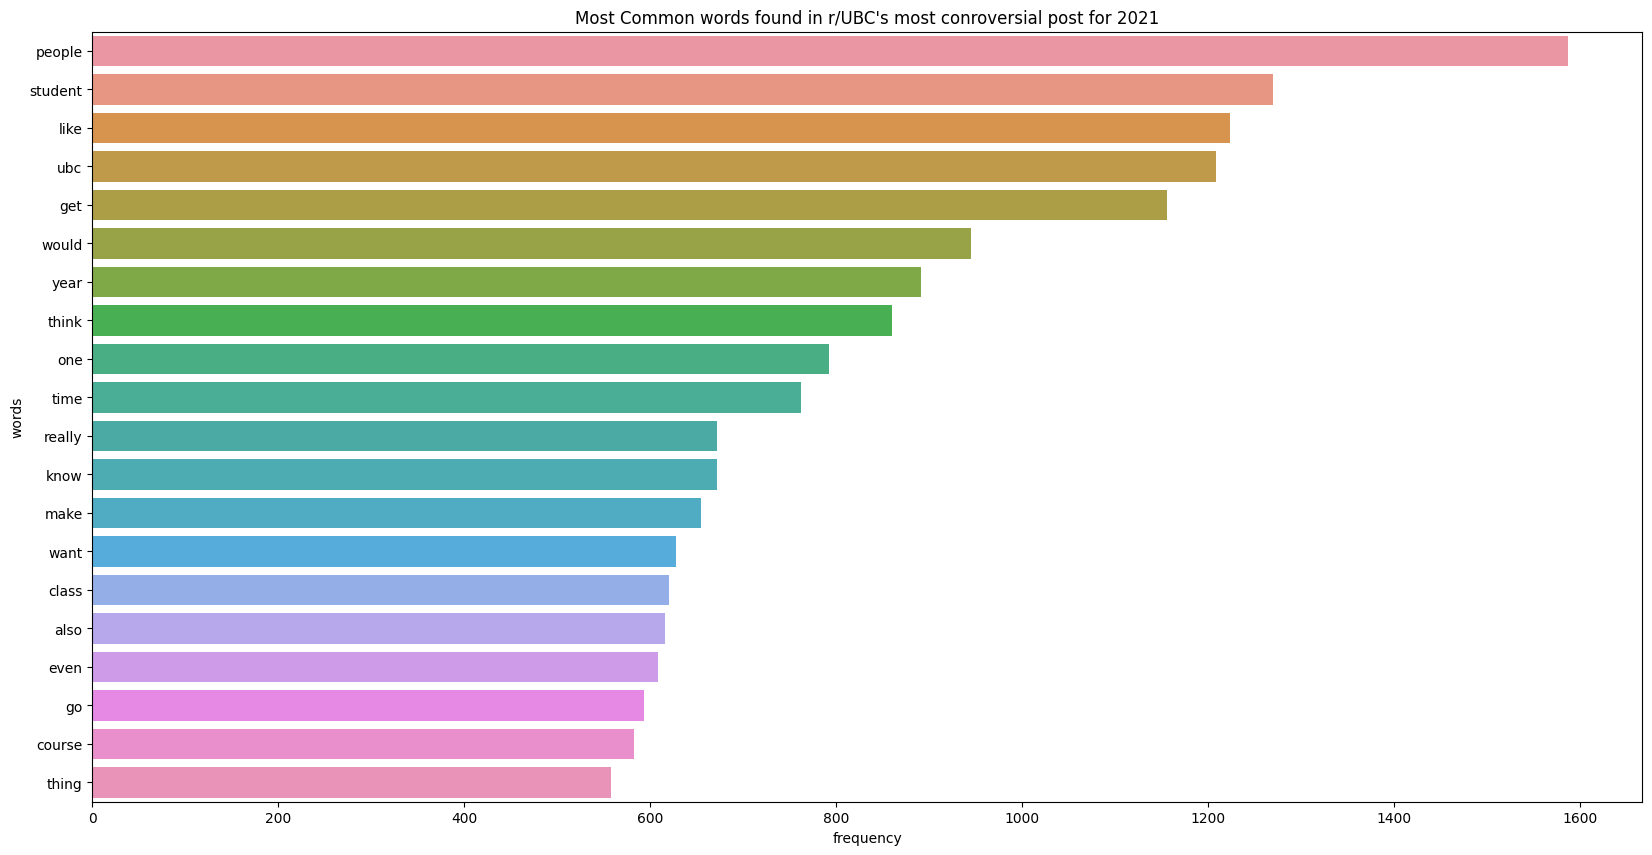

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import praw
import time

df = pd.read_csv('headlines.csv')
comments="".join(df['title'])


#print(comments)
lemmatizer = WordNetLemmatizer()

def clean_words(new_tokens):
    new_tokens=[t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')+["b"]] #THIS PART IS IMPORTANT
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lem_tokens=[lemmatizer.lemmatize(t) for t in new_tokens]
    return lem_tokens

words=word_tokenize(comments)
lowered=clean_words(words)
bow=Counter(lowered)
data=pd.DataFrame(bow.items(),columns=['words','frequency']).sort_values(by='frequency',ascending=False)
data=data.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x='frequency',y='words',data=data).set_title("Most Common words found in r/UBC's most conroversial post for 2021")

plt.show()


In [6]:

bow2=Counter(ngrams(lowered,2))

def word_frequency(sentence):
    sentence=" ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')+["b"]]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    new_tokens=[lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2=Counter(ngrams(new_tokens,2))
    counted_3=Counter(ngrams(new_tokens,3))
    word_freq=pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs=pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams=pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

data2,data3,data4=word_frequency(df['title'])



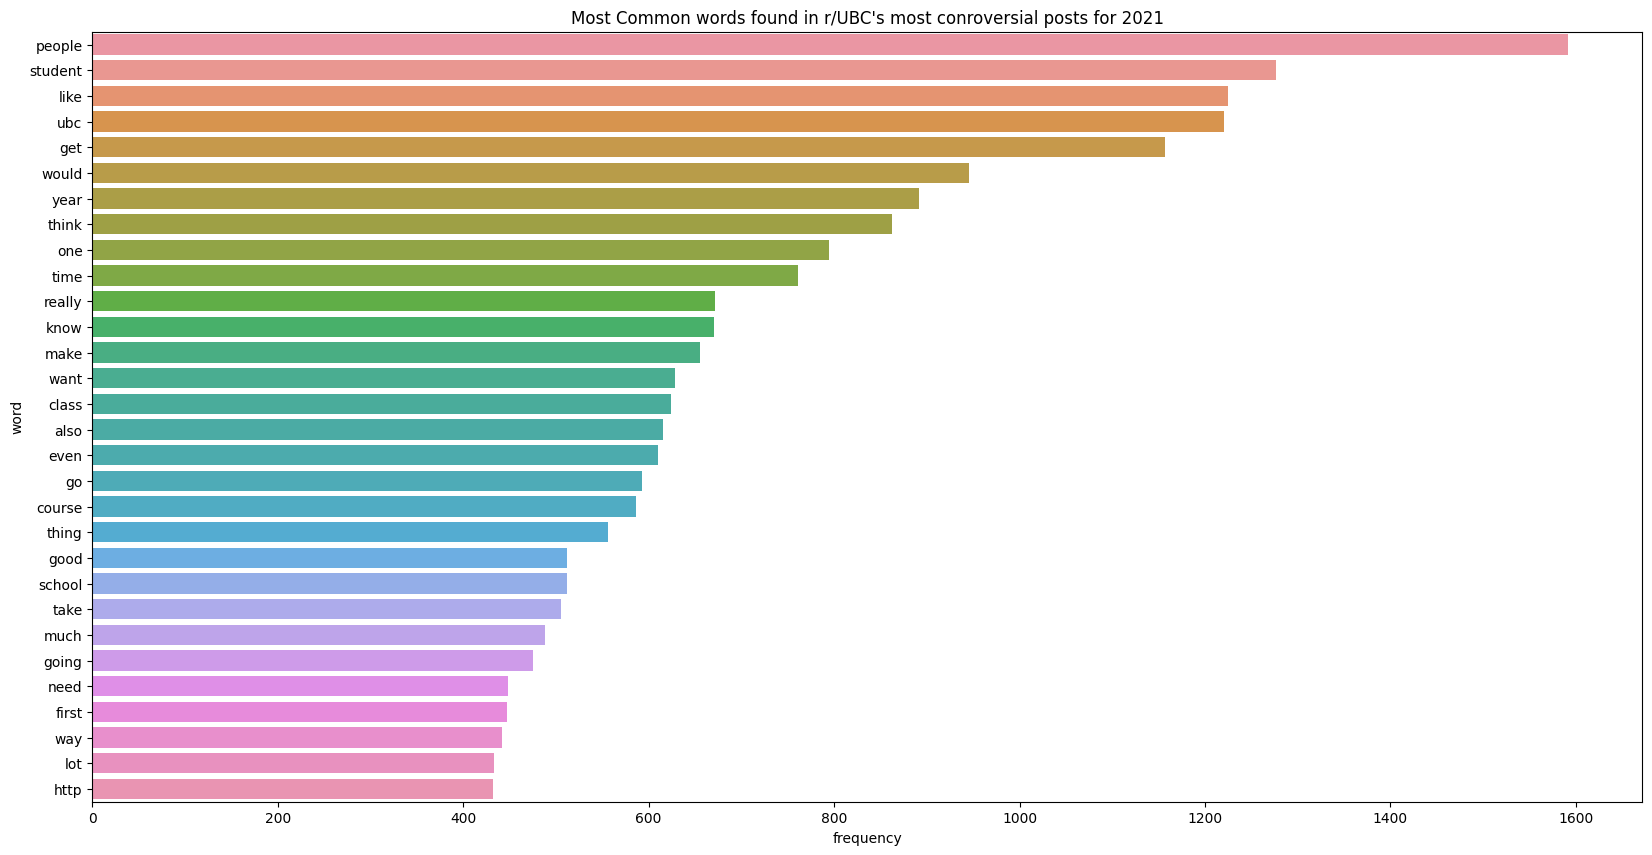

In [14]:


#fig, axes = plt.subplots(3,1,figsize=(8,20))
plt.figure(figsize=(20,10))
sns.barplot(x='frequency',y='word',data=data2.head(30)).set_title("Most Common words found in r/UBC's most conroversial posts for 2021")
plt.show()

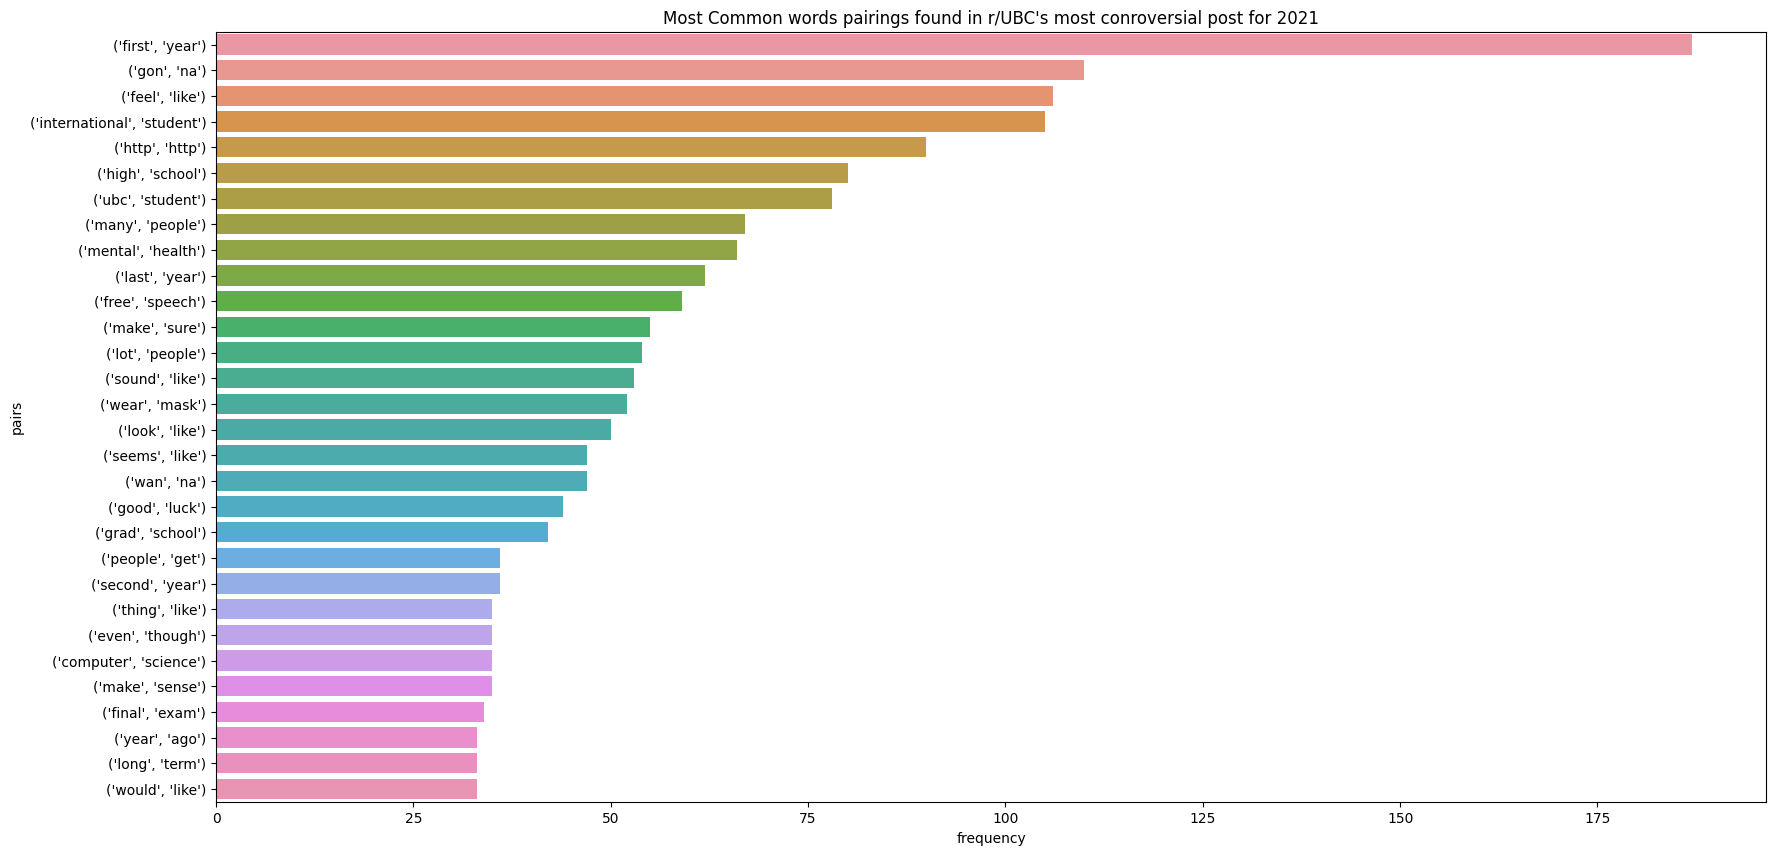

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(x='frequency',y='pairs',data=data3.head(30)).set_title("Most Common words pairings found in r/UBC's most conroversial posts for 2021")
plt.show()
plt.show()


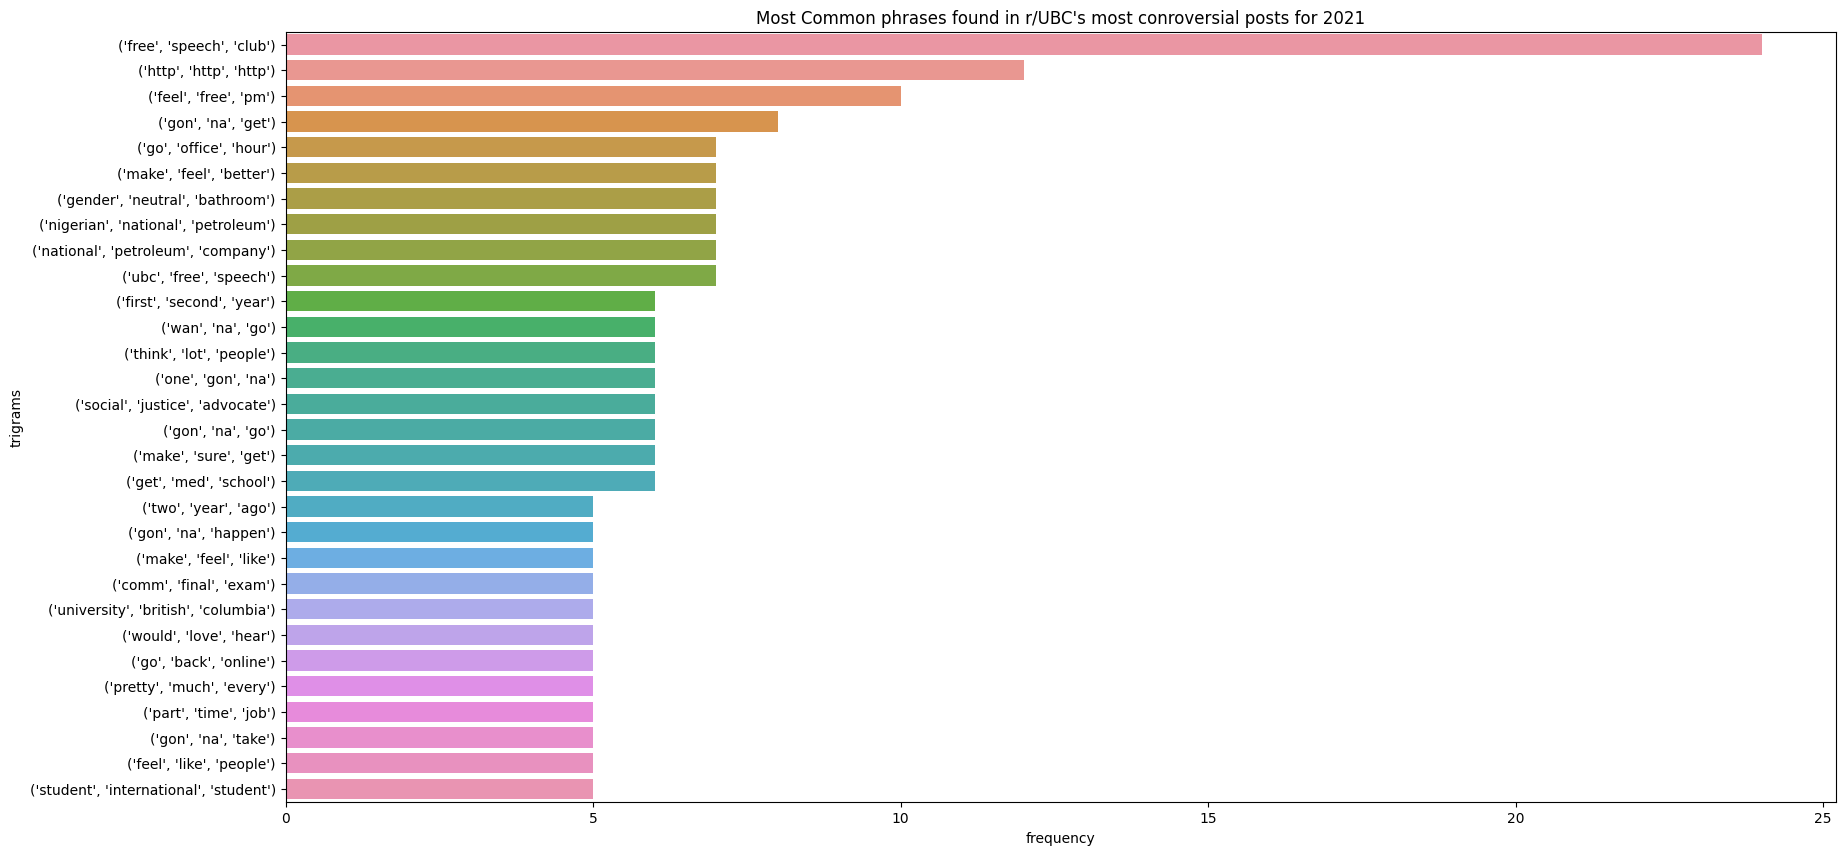

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x='frequency',y='trigrams',data=data4.head(30)).set_title("Most Common phrases found in r/UBC's most conroversial posts for 2021")
plt.show()
plt.show()

In [17]:


import emoji
def get_emojis(sentence):
    sentence =" ".join(sentence)
    words = word_tokenize(sentence)
    emojis=[e for e in words if emoji.is_emoji(e)]
    return emojis

emojis_bow=get_emojis(df['title'])
print(Counter(emojis_bow).items())

emoji_count=(Counter(emojis_bow).items())
emoji_frame=pd.DataFrame(emoji_count,columns=['emoji','count'])
#plt.figure(figsize=(20,10))
emoji_frame.head(20).sort_values(by='count',ascending=False)

dict_items([('⭐', 2), ('💰', 1), ('📚', 1), ('💻', 1), ('📋', 1), ('🙏', 1), ('🤑', 1), ('😇', 1), ('🙄', 1), ('🙃', 1), ('💕', 1), ('❤️', 1), ('⁉️', 1), ('🙂', 1)])


,emoji,count
0,⭐,2
1,💰,1
2,📚,1
3,💻,1
4,📋,1
5,🙏,1
6,🤑,1
7,😇,1
8,🙄,1
9,🙃,1
